In [1]:
"""
In this notebook , I wanted to try attention layer for a simple nlp problem.
Load IMDB dataset, 
train a LSTM network
train a LSTM with attention

For this simple problem,there seems to be no difference.
I think it will make difference if this was a text generation.
"""
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras_self_attention import SeqSelfAttention, SeqWeightedAttention

max_features = 10000
maxlen = 500
batch_size = 32

# data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = sequence.pad_sequences(x_train, maxlen= maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# model 
from keras import models
from keras import layers
from keras.layers import Dense, Embedding, LSTM, Bidirectional, Flatten


Using TensorFlow backend.


In [0]:
#!pip install keras_self_attention

In [10]:
model = models.Sequential()
model.add( Embedding(max_features, 32))
model.add(Bidirectional( LSTM(32, return_sequences=False)))
model.add(Dense(16, activation='sigmoid'))

model.add( Dense(1, activation='sigmoid') )

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 64)                16640     
_________________________________________________________________
dense_10 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 337,697
Trainable params: 337,697
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 129s 6ms/step - loss: 0.5860 - acc: 0.6981 - val_loss: 0.4616 - val_acc: 0.8086
Epoch 2/10
20000/20000 [==============================] - 131s 7ms/step - loss: 0.3404 - acc: 0.8704 - val_loss: 0.4210 - val_acc: 0.8128
Epoch 3/10
20000/20000 [==============================] - 129s 6ms/step - loss: 0.2619 - acc: 0.9021 - val_loss: 0.3237 - val_acc: 0.8852
Epoch 4/10
20000/20000 [==============================] - 126s 6ms/step - loss: 0.2172 - acc: 0.9227 - val_loss: 0.3382 - val_acc: 0.8768
Epoch 5/10
20000/20000 [==============================] - 129s 6ms/step - loss: 0.1892 - acc: 0.9363 - val_loss: 0.3518 - val_acc: 0.8728
Epoch 6/10
20000/20000 [==============================] - 131s 7ms/step - loss: 0.1671 - acc: 0.9437 - val_loss: 0.3327 - val_acc: 0.8650
Epoch 7/10
20000/20000 [==============================] - 127s 6ms/step - loss: 0.1483 - acc: 0.9514 - val_loss: 0.3661 - v

In [12]:
model2 = models.Sequential()
model2.add( Embedding(max_features, 32))
model2.add(Bidirectional( LSTM(32, return_sequences=True)))
# add an attention layer
model2.add(SeqWeightedAttention())

model2.add( Dense(1, activation='sigmoid') )

# compile and fit
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model2.summary()

history = model2.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
bidirectional_8 (Bidirection (None, None, 64)          16640     
_________________________________________________________________
seq_weighted_attention_2 (Se (None, 64)                65        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 65        
Total params: 336,770
Trainable params: 336,770
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 147s 7ms/step - loss: 0.5740 - acc: 0.6931 - val_loss: 0.4465 - val_acc: 0.8236
Epoch 2/10
20000/20000 [==============================] - 140s 7ms/step - loss: 0.3616 - acc: 0.8524 - val_loss: 0.3310 - val_acc: 0.8630
Epoch 3/10
20000/20000 [==============================] - 136s 7ms/step - loss: 0.2701 - acc: 0.8945 - val_loss: 0.4419 - val_acc: 0.7976
Epoch 4/10
20000/20000 [==============================] - 141s 7ms/step - loss: 0.2227 - acc: 0.9158 - val_loss: 0.5018 - val_acc: 0.8206
Epoch 5/10
20000/20000 [==============================] - 138s 7ms/step - loss: 0.1867 - acc: 0.9288 - val_loss: 0.2922 - val_acc: 0.8886
Epoch 6/10
20000/20000 [==============================] - 135s 7ms/step - loss: 0.1625 - acc: 0.9410 - val_loss: 0.3336 - val_acc: 0.8718
Epoch 7/10
20000/20000 [==============================] - 137s 7ms/step - loss: 0.1449 - acc: 0.9481 - val_loss: 0.2971 - v

In [9]:
predict = model.predict( x_train[0].reshape(1,500) )
predict

array([[0.8235177]], dtype=float32)

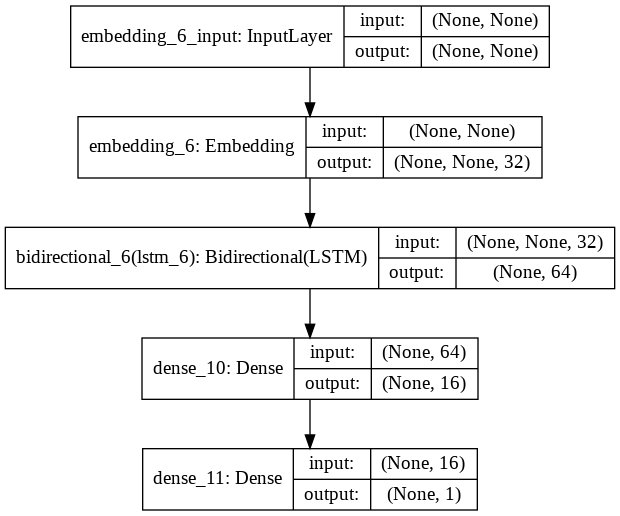

In [13]:

from keras.utils import plot_model

plot_model(model, to_file='multiple_outputs.png',show_shapes=True)


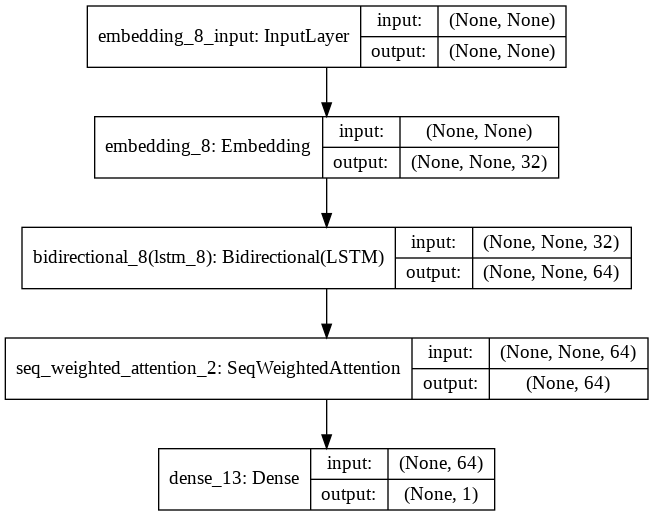

In [14]:
from keras.utils import plot_model

plot_model(model2, to_file='multiple_outputs.png',show_shapes=True)